# Метод обратной квадратичной интерполяции


1.   Реализовать метод обратной квадратичной интерполяции для нахождения корня нелинейного уравнения.
2.   Привести примеры уравнений, для которых процесс а) сходится сверхлинейно; б) сходится с линейной скоростью; в) не сходится.
3.   Ваша программа должна строить графики этих функций, выдавать найденный корень и количество вычислений значений функции.


  

Импортируем нужные библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import interpolate
import math

##Алгоритм обратной квадратной интерполяции
Как следует из названия, в этом методе для определения нового приближения к корню уравнения $f(x)=0$ используется квадратичная интерполяция функции $ x = g(y)$, обратной по отношению к функции $ y = f(x) $ Так как для интерполяции полиномом второй степени необходимы три точки на плоскости $(x,y)$, то выберем их из трех последовательных приближений к корню.
Так как мы не может просто вычислить $x_{r}=g(0) $ ь заменим $g(y)$ полиномом $P_2(y)$ в окресности корня, Тогда есть основания ожидать что $P_2(0)$ приблизит нас к корню исходного уравнения: $x_{k+1}=P_2(0)$
Таким образом все наши действия сводяться к формуле:
$$x_{k+1}=\frac{y_{k-1}y_{k-2}x_{k}}{(y_{k}-y_{k-1})(y_{k}-y_{k-2})}+
\frac{y_{k}y_{k-2}x_{k-1}}{(y_{k-1}-y_{k})(y_{k-1}-y_{k-2})}+
\frac{y_{k}y_{k-1}x_{k-2}}{(y_{k-2}-y_{k})(y_{k-2}-y_{k-1})}
$$

In [ ]:
def inverse_quadratic_interpolation(f, x0, x1, x2, max_iter=1, tolerance=0.0001):
    steps_taken = 0
    f_calls = 0
    y = np.array([])
    while steps_taken < max_iter and abs(x1-x0) > tolerance: 
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)
        f_calls += 3
        L0 = (x0 * fx1 * fx2) / ((fx0 - fx1) * (fx0 - fx2))
        L1 = (x1 * fx0 * fx2) / ((fx1 - fx0) * (fx1 - fx2))
        L2 = (x2 * fx1 * fx0) / ((fx2 - fx0) * (fx2 - fx1))
        new = L0 + L1 + L2
        x0, x1, x2 = new, x0, x1
        steps_taken += 1
        y = np.append(y,x0)
    return x0, f_calls , y

Алгоритм ограничен минимальной разницей между элементами и максимальным числом итераций. После окончания работы алгоритма получаем приближенный результат и число вызовов функции

In [ ]:
def draw_graph(f,st,fn):
  x = np.linspace(st,fn,1000)
  y = f(x)
  plt.subplot(122)
  plt.plot(x,y,'-')
  plt.show

def draw_inter(y,true_root=0):
  x = np.linspace(0,len(y),len(y))
  plt.subplot(121)
  plt.plot(x,y-true_root)
  plt.show

Функции для отрисовки графиков.

## Сходящаяся с линейной скоростью

Корень - -10.0
Число вызовов функции - 6


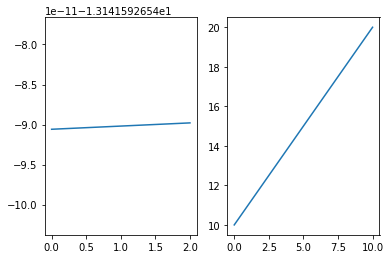

In [ ]:
f = lambda x: x+10
draw_graph(f,0,10)
root,f_calls,y = inverse_quadratic_interpolation(f,2,2.2,3,100)
draw_inter(y,np.pi)
print("Корень -",root)
print("Число вызовов функции -",f_calls)

Как видно на графике, функция сходиться линейно . Полученый корень - как и ожидалось, -10, а за 2 итерации функция была вызвана 6 раз

## Сходящаяся сверхлинейно функция

Корень - 0.8654740799432863
Число вызовов функции - 27


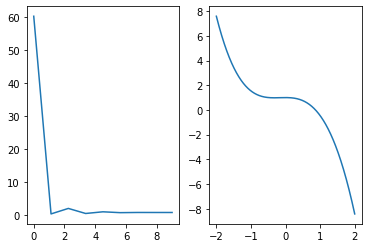

In [ ]:
f = lambda x: np.cos(x)-x**3
draw_graph(f,-2,2)
root,f_calls,y = inverse_quadratic_interpolation(f,-1,-0.5,0.2,100)
draw_inter(y)
print("Корень -",root)
print("Число вызовов функции -",f_calls)

Как видно по графику, функция подошла к близкому корню меньше, чем за 2 итерации, а затем замедлила скорость схождения.

Корень - -1.2460693228874992e-09
Число вызовов функции - 12


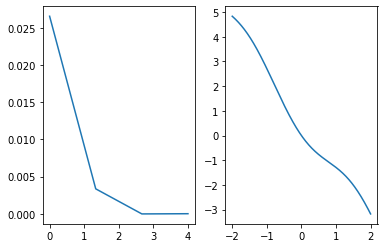

In [ ]:
f = lambda x: np.sin(x)**2-2*x
draw_graph(f,-2,2)
root,f_calls,y = inverse_quadratic_interpolation(f,-1,-0.5,0.2,100)
draw_inter(y)
print("Корень -",root)
print("Число вызовов функции -",f_calls)

Функция приходит к очень близкому результату всего за 4 итерации, получая очень приближенный ответ к реальному корню уравнения - $x=0$

Корень - -1.8528923802041029
Число вызовов функции - 15


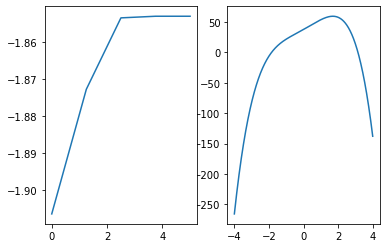

In [ ]:
f = lambda x: (x+5)**2+6*x-x**4+13
draw_graph(f,-4,4)
root,f_calls,y = inverse_quadratic_interpolation(f,-4,-3,-2,100)
draw_inter(y)
print("Корень -",root)
print("Число вызовов функции -",f_calls)


## Не сходящиеся функции

Корень - 42.411596072299105
Число вызовов функции - 48


9.072340902615833e-09

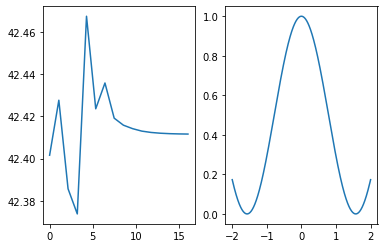

In [ ]:
f = lambda x: np.cos(x)**2
draw_graph(f,-2,2)
root,f_calls,y = inverse_quadratic_interpolation(f,-50,-40,2,100)
draw_inter(y)
print("Корень -",root)
print("Число вызовов функции -",f_calls)
f(root)

При большом разбросе между начальными точками и корнем, функция ведет себя непредсказуемо.

# Вывод
Метод обратной квадратной интерполяции хорошо подходит для поиска корней нелинейных квадратных уравнений. Он достаточно быстр, но требует наличия трех начальных точек, с разным значением функции в них. Метод показывает хорошие результаты если корень находиться рядом с начальными точками. В большинстве ситуаций получаються довольно точные значения корня всего за несколько итераций.